In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./../Data/meta_data.11192021.csv')

In [5]:
patient_dict = {}
for idx in df['PATNO'].drop_duplicates() :
    patient_dict[idx] = {}
    patient_dict[idx]['Sample Name'] = list(df[df['PATNO'] == idx]['HudAlphaSampleName'])
    patient_dict[idx]['Cohort'] = list(df[df['PATNO'] == idx]['Disease Status'])

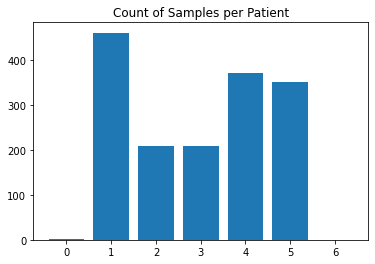

In [25]:
count = []
for pat in patient_dict : 
    count.append(len(patient_dict[pat]['Cohort']))
    
plt.bar([i for i in range(0,7)],[count.count(i) for i in range(0,7) ])
plt.title('Count of Samples per Patient')
plt.savefig('samples_per_patient.png')

### Check if any patient changes Cohort

In [8]:
for pat in patient_dict : 
    if len(set(patient_dict[pat]['Cohort'])) > 1 :
        print(pat)

### Reproduce PCA From Meta File

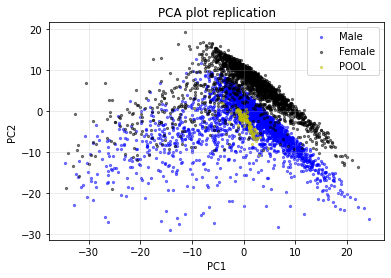

In [24]:
plt.grid(alpha = 0.3)
plt.scatter(df[df['Sex'] == 'Male']['PC1'] , df[df['Sex'] == 'Male']['PC2'] , c='b' , s=5 , alpha = 0.5 )
plt.scatter(df[df['Sex'] == 'Female']['PC1'] , df[df['Sex'] == 'Female']['PC2'] , c='k' , s= 5 , alpha = 0.5)
plt.scatter(df[df['Sex'] == 'POOL']['PC1'] , df[df['Sex'] == 'POOL']['PC2'] , c='y' , s =5 , alpha = 0.5 )
plt.title('PCA plot replication')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Male','Female','POOL'])
plt.savefig('PCA_rep.png')